In [27]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('Dependencies installed!')

Dependencies installed!


In [40]:
# Connecting to database:
conn = sqlite3.connect('factbook.db')

# Saving cursor execution to variable:
cursor = conn.cursor()

# Creating query and format type:
query = 'SELECT * FROM sqlite_master WHERE type="table"'

# Displaying columns of database:
cursor.execute(query).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [4]:
# Reading database with Pandas:
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [5]:
# Creating second query displaying facts:
query2 = 'SELECT * FROM facts LIMIT 5'

# Reading database with Pandas:
pd.read_sql_query(query2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


# Analyzing the CIA factbook:

In [8]:
# Selecting the min population:
min_population = 'SELECT name, MIN(population) min_population FROM facts'

# Reading database with Pandas:
pd.read_sql_query(min_population, conn)

,name,population
0,Antarctica,0


In [9]:
# Selecting the max population:
max_population = 'SELECT name, MAX(population) max_population FROM facts'

# Reading database with Pandas:
pd.read_sql_query(max_population, conn)

,name,max_population
0,World,7256490011


In [13]:
# Selecting the min population:
min_population_growth = 'SELECT name, MIN(population_growth) min_population_growth FROM facts'

# Reading database with Pandas:
pd.read_sql_query(min_population_growth, conn)

,name,min_population_growth
0,Holy See (Vatican City),0.0


In [14]:
# Selecting the max population:
max_population_growth = 'SELECT name, MAX(population_growth) max_population_growth FROM facts'

# Reading database with Pandas:
pd.read_sql_query(max_population_growth, conn)

,name,max_population_growth
0,South Sudan,4.02


In [15]:
# Selecting countries that have 0 population:
zero_population = 'SELECT name, population FROM facts WHERE population == 0'

pd.read_sql_query(zero_population, conn)

,name,population
0,Antarctica,0


In [16]:
too_much_population = 'SELECT name, population FROM facts WHERE population == 7256490011'

pd.read_sql_query(too_much_population, conn)

,name,population
0,World,7256490011


The minimun and maximun values are a little skewed since the database includes the sum of all the countries and is included as a single row. Antartica is also included even though is the only place in the world that is not recognized as a country and population is not allowed to leave in unless it's for scientific reasons.

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165b3550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116909748>]], dtype=object)

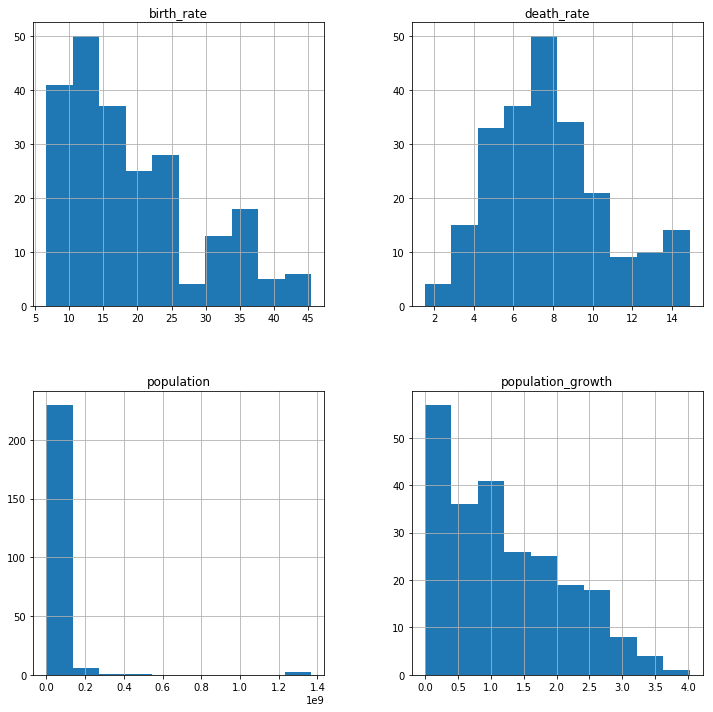

In [39]:
# Selecting different populations rates:
countries_database = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MAX(population) FROM facts)
AND population != (SELECT MIN(population) FROM facts)'''

# Setting up the dimension of the figures:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

# Reading and creating the figures based on the different population rates:
pd.read_sql_query(countries_database, conn).hist(ax=ax)